In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

### Logistic Regression 
The logistic - noted $\sigma(\cdot)$ is a *sigmoid function* (i.e., S-shaped) that outputs numbers between 0 and 1. It is defined as:

$$\sigma(t) = \frac{1}{1 + exp(-t)} = \frac{1}{1+e^{-t}}$$

In [4]:
np.random.seed(42)
m = 500

X = 20 * np.random.rand(m, 1) - 10

y_clean = 1 / (1 + np.exp(-X))
y_noisy = y_clean + 0.15 * np.random.randn(m, 1)

df  = pd.DataFrame({'Feature X':X.ravel(), 'Clean y':y_clean.ravel(), 'Noisy y':y_noisy.ravel()})

In [5]:
training_data = df[:400]
validation_data = df[400:]

In [6]:
X_train = training_data['Feature X'].values.reshape(-1, 1)
X_test = validation_data['Feature X'].values.reshape(-1, 1)

y_clean_train = training_data['Clean y'].values.reshape(-1, 1)
y_clean_test = validation_data['Clean y'].values.reshape(-1, 1)

y_noisy_train = training_data['Noisy y'].values.reshape(-1, 1)
y_noisy_test = validation_data['Noisy y'].values.reshape(-1, 1)

In [7]:
def compute_RMSE(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

In [8]:
linear_clean = LinearRegression().fit(X_train, y_clean_train)
linear_noisy = LinearRegression().fit(X_train, y_noisy_train)

rmse_linear_clean = compute_RMSE(linear_clean, X_test, y_clean_test)
rmse_linear_noisy = compute_RMSE(linear_noisy, X_test, y_noisy_test)

print(f"Linear Model RMSE (Clean): {rmse_linear_clean}")
print(f"Linear Model RMSE (Noisy): {rmse_linear_noisy}")

Linear Model RMSE (Clean): 0.1597
Linear Model RMSE (Noisy): 0.2264


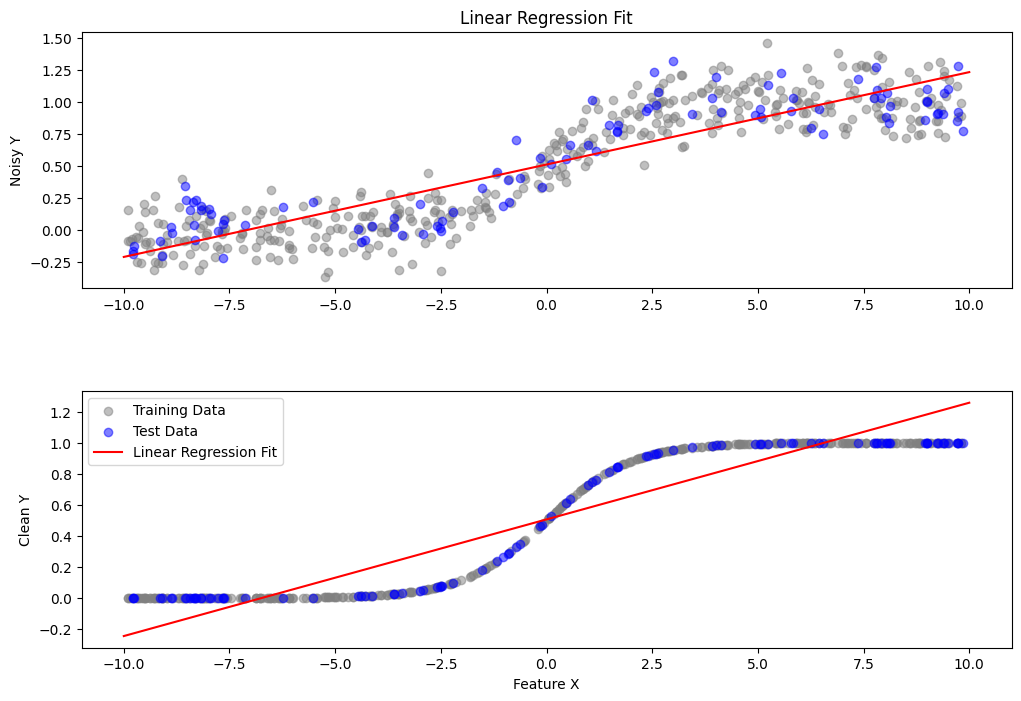

In [31]:
x_range = np.linspace(-10, 10, 500).reshape(-1, 1)
y_pred_clean = linear_clean.predict(x_range)
y_pred_noisy = linear_noisy.predict(x_range)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_noisy_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_noisy_test, color='blue', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred_clean, color='red', label="Linear Regression Fit")
plt.ylabel("Noisy Y")
plt.title("Linear Regression Fit")

plt.subplot(2, 1, 2)
plt.scatter(X_train, y_clean_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_clean_test, color='blue', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred_noisy, color='red', label="Linear Regression Fit")
plt.xlabel("Feature X")
plt.ylabel("Clean Y")
plt.legend()

plt.subplots_adjust(hspace=0.4)

plt.show()

In [ ]:
degrees = [2, 3, 4, 5]
rmse_results = {}

for d in degrees:
    poly_model_clean = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly_model_noisy = make_pipeline(PolynomialFeatures(d), LinearRegression())

    poly_model_clean.fit(X_train, y_clean_train)
    poly_model_noisy.fit(X_train, y_noisy_train)

    rmse_clean = compute_RMSE(poly_model_clean, X_test, y_clean_test)
    rmse_noisy = compute_RMSE(poly_model_noisy, X_test, y_noisy_test)

    rmse_results[d] = (rmse_clean, rmse_noisy)

    print(f"Degree {d} Polynomial RMSE (Clean): {rmse_clean}")
    print(f"Degree {d} Polynomial RMSE (Noisy): {rmse_noisy}\n")

    x_range = np.linspace(-10, 10, 500).reshape(-1, 1)
    y_pred_clean = poly_model_clean.predict(x_range)
    y_pred_noisy = poly_model_noisy.predict(x_range)

    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, d - 1)
    plt.scatter(X_train, y_noisy_train, color='gray', label="Training Data", alpha=0.5)
    plt.scatter(X_test, y_noisy_test, color='blue', label="Test Data", alpha=0.5)
    plt.plot(x_range, y_pred_clean, color='red', label="Linear Regression Fit")
    plt.ylabel("Noisy Y")
    plt.title("Linear Regression Fit")

    plt.subplot(2, 1, 2)
    plt.scatter(X_train, y_clean_train, color='gray', label="Training Data", alpha=0.5)
    plt.scatter(X_test, y_clean_test, color='blue', label="Test Data", alpha=0.5)
    plt.plot(x_range, y_pred_noisy, color='red', label="Linear Regression Fit")
    plt.xlabel("Feature X")
    plt.ylabel("Clean Y")
    plt.legend()

    plt.subplots_adjust(hspace=0.4)

    plt.show()

Degree 2 Polynomial RMSE (Clean): 0.1597
Degree 2 Polynomial RMSE (Noisy): 0.2251

Degree 3 Polynomial RMSE (Clean): 0.078
Degree 3 Polynomial RMSE (Noisy): 0.1731

Degree 4 Polynomial RMSE (Clean): 0.0779
Degree 4 Polynomial RMSE (Noisy): 0.173

Degree 5 Polynomial RMSE (Clean): 0.0415
Degree 5 Polynomial RMSE (Noisy): 0.1456



In [11]:
alpha = 0.1  # Regularization strength

for d in degrees:
    ridge_clean = make_pipeline(PolynomialFeatures(d), Ridge(alpha=alpha))
    ridge_noisy = make_pipeline(PolynomialFeatures(d), Ridge(alpha=alpha))
    
    lasso_clean = make_pipeline(PolynomialFeatures(d), Lasso(alpha=alpha, max_iter=5000))
    lasso_noisy = make_pipeline(PolynomialFeatures(d), Lasso(alpha=alpha, max_iter=5000))

    ridge_clean.fit(X_train, y_clean_train)
    ridge_noisy.fit(X_train, y_noisy_train)
    lasso_clean.fit(X_train, y_clean_train)
    lasso_noisy.fit(X_train, y_noisy_train)

    rmse_ridge_clean = compute_RMSE(ridge_clean, X_test, y_clean_test)
    rmse_ridge_noisy = compute_RMSE(ridge_noisy, X_test, y_noisy_test)
    
    rmse_lasso_clean = compute_RMSE(lasso_clean, X_test, y_clean_test)
    rmse_lasso_noisy = compute_RMSE(lasso_noisy, X_test, y_noisy_test)

    print(f"Degree {d} Ridge RMSE (Clean): {rmse_ridge_clean}")
    print(f"Degree {d} Ridge RMSE (Noisy): {rmse_ridge_noisy}")
    print(f"Degree {d} LASSO RMSE (Clean): {rmse_lasso_clean}")
    print(f"Degree {d} LASSO RMSE (Noisy): {rmse_lasso_noisy}\n")


Degree 2 Ridge RMSE (Clean): 0.1597
Degree 2 Ridge RMSE (Noisy): 0.2251
Degree 2 LASSO RMSE (Clean): 0.1564
Degree 2 LASSO RMSE (Noisy): 0.2204

Degree 3 Ridge RMSE (Clean): 0.078
Degree 3 Ridge RMSE (Noisy): 0.1731
Degree 3 LASSO RMSE (Clean): 0.0868
Degree 3 LASSO RMSE (Noisy): 0.1753

Degree 4 Ridge RMSE (Clean): 0.0779
Degree 4 Ridge RMSE (Noisy): 0.173
Degree 4 LASSO RMSE (Clean): 0.0871
Degree 4 LASSO RMSE (Noisy): 0.1749

Degree 5 Ridge RMSE (Clean): 0.0415
Degree 5 Ridge RMSE (Noisy): 0.1456
Degree 5 LASSO RMSE (Clean): 0.0877
Degree 5 LASSO RMSE (Noisy): 0.1784



In [25]:
degree = 20
lasso_20 = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=10000))
lasso_20.fit(X_train, y_noisy_train)

# Count nonzero coefficients
lasso_coef = lasso_20.named_steps["lasso"].coef_
num_nonzero = np.count_nonzero(lasso_coef)

print(f"Degree 20 LASSO: {degree + 1 - num_nonzero} zero coefficients out of {degree + 1}")

Degree 20 LASSO: 2 zero coefficients out of 21


c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.207e+00, tolerance: 9.619e-03
  model = cd_fast.enet_coordinate_descent(


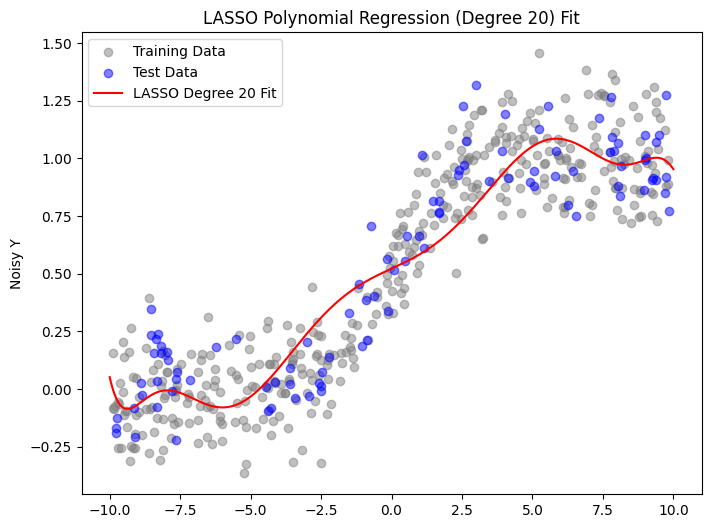

In [24]:
x_range = np.linspace(-10, 10, 500).reshape(-1, 1)
y_pred = lasso_20.predict(x_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_noisy_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_noisy_test, color='blue', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred, color='red', label="LASSO Degree 20 Fit")
plt.ylabel("Noisy Y")
plt.title("LASSO Polynomial Regression (Degree 20) Fit")
plt.legend()

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_new=np.linspace(-3, 3, 100).reshape(100, 1) # X_test
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    model = make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.1, max_iter=10000))
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.871e-01, tolerance: 1.148e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+00, tolerance: 1.963e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

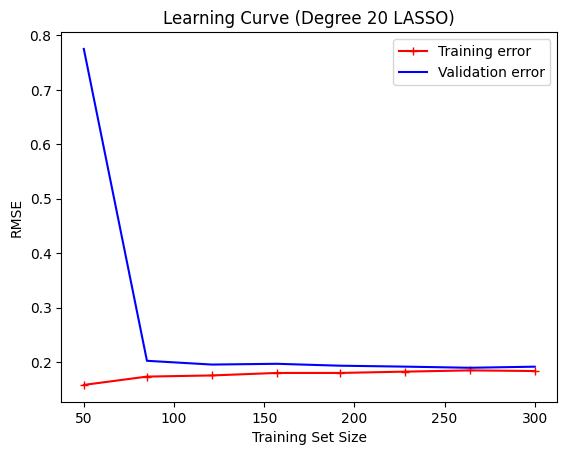

In [15]:
from sklearn.model_selection import train_test_split

train_sizes = np.linspace(50, 300, 8, dtype=int)
train_errors, val_errors = [], []

for size in train_sizes:
    X_partial, _, y_partial, _ = train_test_split(X_train, y_noisy_train, train_size=size, random_state=42)
    model = make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.1, max_iter=10000))
    model.fit(X_partial, y_partial)

    train_errors.append(compute_RMSE(model, X_partial, y_partial))
    val_errors.append(compute_RMSE(model, X_test, y_noisy_test))

plt.plot(train_sizes, train_errors, "r-+", label="Training error")
plt.plot(train_sizes, val_errors, "b-", label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (Degree 20 LASSO)")
plt.legend()
plt.show()
